# Análise Exploratória de Dados

## Entendimento do Problema 
* #### Cota para o Exercício da Atividade Parlamentar *(CEAP)*  

**CEAP** (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar. Existe um conjunto de regras que define quais atividades podem ser indenizadas, como passagens aéreas, telefonia, alimentação, hospedagem, locação de veículos, combustíveis, cursos, palestras, entre outros.   

O valor limite do CEAP depende da federação que o deputado representa. Essa variação ocorre devido ao valor da passagem aérea entre a Brasília e a federação.

<img align="center" width="600" height="200" src="img/limitesCEAP.png">

**Fonte:** [Informações e legislação sobre as cotas para o exercício da atividade parlamentar.](https://www2.camara.leg.br/transparencia/acesso-a-informacao/copy_of_perguntas-frequentes/cota-para-o-exercicio-da-atividade-parlamentar)

## Objetivos da análise
* **Quais partidos fizeram mais solicitações de reembolso?**  
* **Quais partidos tem mais representantes?**  
* **Quais partidos possuem as maiores médias de gasto?**  
* **Quais parlamentares ultrapassaram o teto de gastos?**  
* **Quais são as maiores despesas dos parlamentares?**
* **Quais estados possuem as maiores despesas?**

## Coleta de Dados
* [**Conjunto de Dados: CEAP 2017**](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar)

## Entendimento e Tratamento dos Dados
* **txNomeParlamentar:** Nome do parlamentar;
* **sgUF:** Sigla da federação que o parlamentar representa;
* **sgPartido:** Sigla do partido;
* **txtDescricao:** Descrição do tipo de despesa;
* **vlrLiquido:** O valor que será reembolsado para o parlamentar;
* **numMes:** Mês do reembolso;
* **numAno:** Ano do reembolso.

**Fonte:** [Descrição de todos atributos.](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml)

### Bibliotecas

In [189]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

#plt.rc('figure', figsize=(12,8))
sns.set(font_scale=1.3, rc={"figure.figsize": [12, 8]})
warnings.filterwarnings('ignore')

#### Lendo os dados com [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [84]:
ceap_2017 = pd.read_csv('Datasets/Ano-2017.csv', delimiter=';')

<img align="center" width="400" height="200" src="img/dataframe.svg">

#### Obtendo as dimensões com o atributo [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape)

In [85]:
#O atributo shape irá nos retornar as dimensões do nosso conjunto de dados
ceap_2017.shape

(367714, 31)

In [80]:
#O atributo columns irá as colunas presente em nosso conjunto de dados
ceap_2017.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [87]:
#Lista de colunas que serão utilizadas para análise
colunas = ['txNomeParlamentar', 'sgUF', 'sgPartido','txtDescricao', 'vlrLiquido', 'numMes', 'numAno']

In [88]:
#Obtendo dataframe apenas com as colunas desejadas
ceap = ceap_2017[colunas]

In [93]:
#Obtendo os 10 primeiros registros
ceap.head(5)

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrLiquido,numMes,numAno
0,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,271.79,7,2017
1,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,63.30,10,2017
2,LID.GOV-CD,NaN,NaN,PASSAGEM AÉREA - REEMBOLSO,1509.80,7,2017
3,LID.GOV-CD,NaN,NaN,PASSAGEM AÉREA - REEMBOLSO,1872.69,7,2017
4,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,216.31,8,2017


#### Renomeando as colunas

In [94]:
ceap.columns

Index(['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao', 'vlrLiquido',
       'numMes', 'numAno'],
      dtype='object')

In [95]:
novas_colunas = ['nome_parlamentar', 'estado', 'partido', 'descricao_despesa', 'valor_despesa', 'mes_despesa', 'ano_despesa']

In [96]:
ceap.columns = novas_colunas

In [97]:
ceap.columns

Index(['nome_parlamentar', 'estado', 'partido', 'descricao_despesa',
       'valor_despesa', 'mes_despesa', 'ano_despesa'],
      dtype='object')

#### Obtendo os valores únicos de um atributo

In [98]:
ceap['partido']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
367709    PSC
367710    PSC
367711    PSC
367712    PSC
367713    PSC
Name: partido, Length: 367714, dtype: object

In [101]:
ceap['partido'].unique()

array([nan, 'AVANTE', 'PSDB', 'MDB', 'DEM', 'PP', 'PSC', 'PODE', 'PSB',
       'PT', 'PRB', 'PTB', 'PPS', 'PDT', 'PSOL', 'PV', 'SOLIDARIEDADE',
       'PSD', 'PR', 'PCdoB', 'PSL', 'PROS', 'REDE', 'PATRI', 'PHS', 'PPL'],
      dtype=object)

#### Formatando os nomes dos parlamentares

In [103]:
len(ceap['nome_parlamentar'].unique())

574

In [104]:
ceap['nome_parlamentar'].unique()[20:30]

array(['Felipe Carreras', 'CELSO PANSERA', 'SIMÃO SESSIM',
       'Arlindo Chinaglia', 'ARNALDO FARIA DE SÁ', 'BETO MANSUR',
       'Celso Russomanno', 'ALEX CANZIANI', 'OSMAR SERRAGLIO',
       'Rubens Bueno'], dtype=object)

In [105]:
"BRUNO DORNELES".title()

'Bruno Dorneles'

In [106]:
def convert_nome(nome):
    return nome.title()

In [107]:
ceap['nome_parlamentar'] = ceap['nome_parlamentar'].apply(convert_nome)

In [108]:
ceap['nome_parlamentar'].unique()[20:30]

array(['Felipe Carreras', 'Celso Pansera', 'Simão Sessim',
       'Arlindo Chinaglia', 'Arnaldo Faria De Sá', 'Beto Mansur',
       'Celso Russomanno', 'Alex Canziani', 'Osmar Serraglio',
       'Rubens Bueno'], dtype=object)

## Análise Exploratória

* ### Quais partidos fizeram mais solicitações de reembolso?

In [111]:
solicitacoes_partido = ceap['partido'].value_counts()

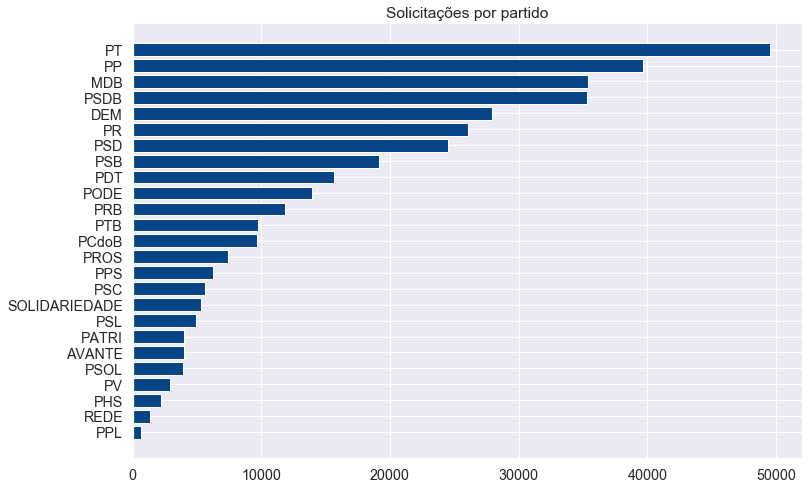

In [112]:
plt.barh(solicitacoes_partido.index, solicitacoes_partido.values, color='#084586')
plt.title("Solicitações por partido")
plt.gca().invert_yaxis();

* ### Quais partidos tem mais representantes?

<img align="center" width="400" height="200" src="img/groupby.png">

In [115]:
representantes_partido = ceap.groupby('partido')['nome_parlamentar'].unique().agg(len).sort_values(ascending=False)

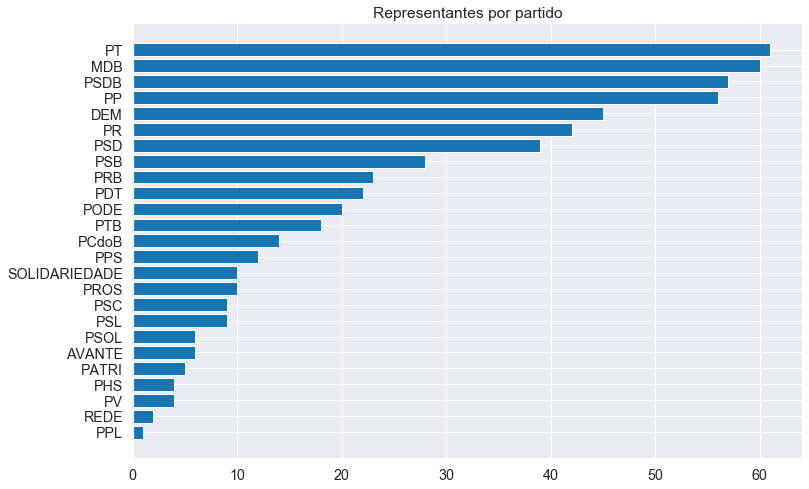

In [116]:
plt.barh(representantes_partido.index, representantes_partido.values, color='#1576B3')
plt.title("Representantes por partido")
plt.gca().invert_yaxis(); 

* ### Quais partidos possuem as maiores médias de gasto?

In [117]:
gasto_partido = ceap.groupby('partido')['valor_despesa'].sum()

In [119]:
media_gasto = (gasto_partido / representantes_partido).sort_values(ascending=False)

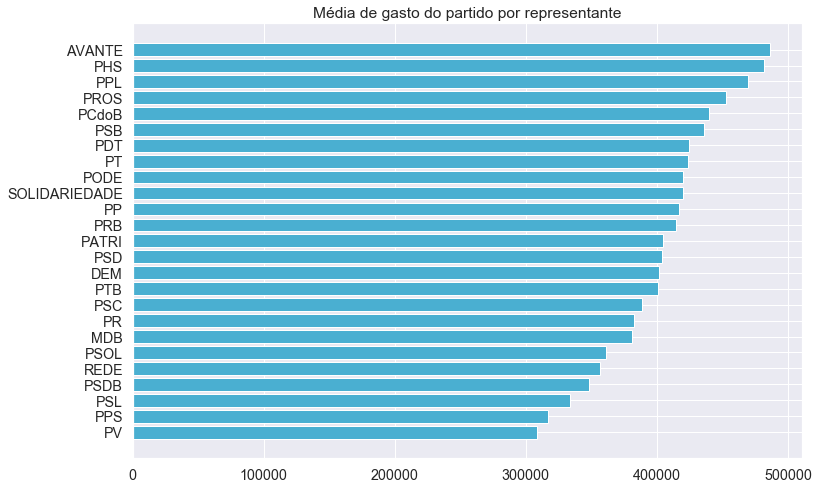

In [120]:
plt.barh(media_gasto.index, media_gasto.values, color='#4AAFD1')
plt.title("Média de gasto do partido por representante")
plt.gca().invert_yaxis(); 

* ### Quais parlamentares ultrapassaram o teto de gastos?

In [122]:
solicitacoes_parlamentar = ceap.groupby('nome_parlamentar')['valor_despesa'].max().sort_values(ascending=False)

In [166]:
gasto_estado_parlamentar = pd.pivot_table(ceap,index=['nome_parlamentar', 'estado'],values=['valor_despesa'],aggfunc=np.max).sort_values(by='valor_despesa', ascending=False)

In [188]:
gasto_estado_parlamentar[gasto_estado_parlamentar['valor_despesa'] > 40000]

,,valor_despesa
nome_parlamentar,estado,
Givaldo Carimbão,AL,155000.0
Pedro Vilela,AL,149800.0
Arlindo Chinaglia,SP,117600.0
Professora Dorinha Seabra Rezende,TO,104895.0
Givaldo Vieira,ES,89492.0
Arthur Lira,AL,86000.0
Hermes Parcianello,PR,80677.0
Daniel Coelho,PE,80010.0
Gonzaga Patriota,PE,79900.0


In [127]:
solicitacoes_parlamentar[solicitacoes_parlamentar.values > 40000]
ceap[ceap['nome_parlamentar'] == 'Givaldo Carimbão']

,nome_parlamentar,estado,partido,descricao_despesa,valor_despesa,mes_despesa,ano_despesa
78068,Givaldo Carimbão,AL,AVANTE,COMBUSTÍVEIS E LUBRIFICANTES.,208.28,2,2017
78069,Givaldo Carimbão,AL,AVANTE,COMBUSTÍVEIS E LUBRIFICANTES.,465.01,1,2017
78070,Givaldo Carimbão,AL,AVANTE,COMBUSTÍVEIS E LUBRIFICANTES.,500.01,11,2017
78071,Givaldo Carimbão,AL,AVANTE,COMBUSTÍVEIS E LUBRIFICANTES.,240.05,11,2017
78072,Givaldo Carimbão,AL,AVANTE,COMBUSTÍVEIS E LUBRIFICANTES.,150.01,11,2017
...,...,...,...,...,...,...,...
78587,Givaldo Carimbão,AL,AVANTE,PASSAGEM AÉREA - RPA,889.93,12,2017
78588,Givaldo Carimbão,AL,AVANTE,PASSAGEM AÉREA - RPA,773.93,12,2017
78589,Givaldo Carimbão,AL,AVANTE,PASSAGEM AÉREA - RPA,870.80,12,2017
78590,Givaldo Carimbão,AL,AVANTE,PASSAGEM AÉREA - RPA,23.00,10,2017


* ### Quais são as maiores despesas dos parlamentares?

In [129]:
despesa = ceap.groupby('descricao_despesa')['valor_despesa'].sum().sort_values(ascending=False).round().head(7)

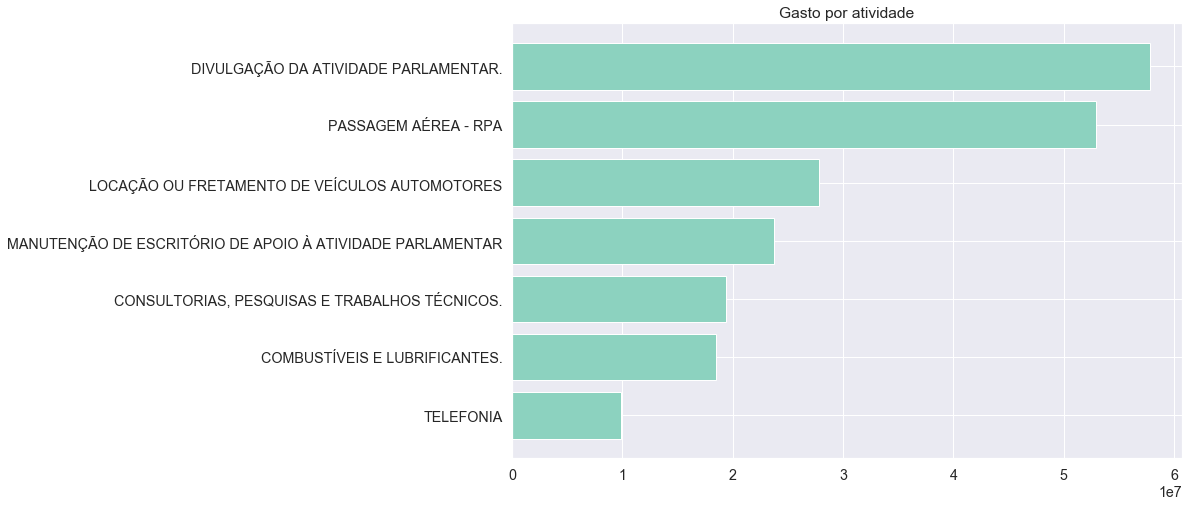

In [130]:
plt.barh(despesa.index, despesa.values, color='#8CD2BF')
plt.title("Gasto por atividade")
plt.gca().invert_yaxis();

* ### Quais estados possuem as maiores despesas?

In [131]:
despesa_estado = ceap.groupby('estado')['valor_despesa'].sum().sort_values(ascending=False)

In [134]:
states = gpd.read_file("bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

Estado: Mato Grosso do Sul


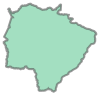

In [135]:
print('Estado: ' + states.nome[1])
states.geometry[1]

In [136]:
states.rename({'sigla':'estado'}, axis=1, inplace=True)
mapa_estados = states.merge(despesa_estado, on='estado', how="left")

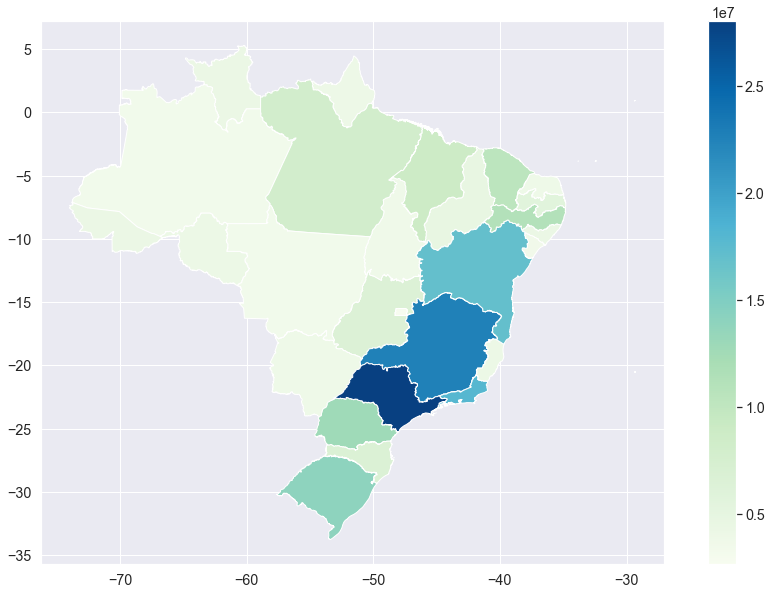

In [137]:
mapa_estados[['estado', 'valor_despesa', 'geometry']]
mapa_estados.plot(column="valor_despesa", cmap="GnBu", figsize=(16,10), legend=True);

## Materias  

### Deseja aprender programação?
* [Python para zumbis](https://www.pycursos.com/python-para-zumbis/)
* [Introdução à Programação com Python](https://www.amazon.com.br/Introdu%C3%A7%C3%A3o-%C3%A0-Programa%C3%A7%C3%A3o-com-Python/dp/8575227181/ref=as_li_ss_tl?ie=UTF8&qid=1547801628&sr=8-1&keywords=nilo+ney+coutinho&linkCode=sl1&tag=livropython-20&linkId=d945781d420befb81bb935576479889a&language=pt_BR)

### Deseja aprender como manipular dados com python?
* [Python Fundamentos para Análise de Dados](https://www.datascienceacademy.com.br/pages/curso-python-fundamentos-para-analise-de-dados)
* [Começando com Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
* [Pandas Cheat Sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)

### Deseja aprimorar seus conhecimentos em manipulação e visualização de dados? 
* [Python para Análise de Dados](https://www.amazon.com.br/Python-Para-An%C3%A1lise-Dados-Tratamento/dp/8575226479/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=363X83W4WA21E&dchild=1&keywords=python+para+analise+de+dados&qid=1599689580&sprefix=python+para+an%2Caps%2C281&sr=8-1)
* [Storytelling com Dados](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=49NHXA09FNU7&dchild=1&keywords=storytelling+com+dados&qid=1599689656&sprefix=story%2Caps%2C320&sr=8-1)

### Está procurando dados para analisar?
* [Kaggle](https://www.kaggle.com/datasets)
* [Portal Brasileiro de Dados Abertos](http://dados.gov.br/)

### Projeto para se inspirar
* [Operação Serenata de Amor](https://serenata.ai/)

### Precisa de ajuda?
* [LinkedIn](https://www.linkedin.com/in/bruno-dorneles/)